<h1><center>Machine Learning Applications</center></h1>
<h2><center>Week 2</center></h2>
<h2><center>Classification using MNIST</center></h2>



In [1]:
# Imports
from google.colab import drive
from pathlib import Path

import pandas as pd
import numpy as np

# Plotting packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [2]:
# Plotting configs
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
# Setting up the notebook.

# 1. Mounting the drive
drive.mount('/content/gdrive', force_remount=True)

# 2. Path on the drive to work in
week_number = 2
base_path = Path("/content/gdrive/MyDrive/mla/tech3300")
path = base_path.joinpath(f"week{week_number}")


Mounted at /content/gdrive


In [4]:
# Helper functions

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    save_path = path.joinpath(f"{fig_id}.{fig_extension}")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(save_path, format=fig_extension, dpi=resolution)


# Preparing the data


In [5]:
# Load the data
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [7]:
mnist.keys()  # we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist.data, mnist.target
X.shape, y.shape

((70000, 784), (70000,))

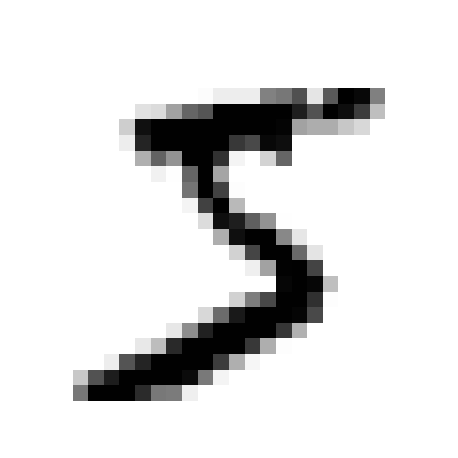

The label is 5


In [9]:
# Plotting a data
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


some_digit = 0  # between 0 and the length of the dataset
plot_digit(X[some_digit])
save_fig("some_digit_plot")
plt.show()

# Corresponding label
print(f"The label is {y[some_digit]}")

In [10]:
# Create Test set - train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

<font color='red'>Q. Pay attention to stratify argument.</font><br>

Ans. For more see [doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

# Training a Dummy Classifier


<font color='red'>Q. What is the strategy for training dummy classifier?</font><br>

Ans - [See documentation](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

In [11]:
# Let's train a model to classify the number as 5 or not a 5.
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

In [12]:
# Train the dummy classifier.
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)

DummyClassifier()

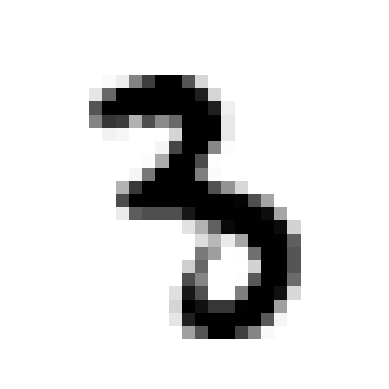

In [13]:
# Plot the first testing point
plot_digit(X_train[0])

In [14]:
# Predict if the first image is a 5 or not.
dummy_clf.predict([X_train[0]])

array([False])

<font color='red'>Q. Use the above classifier to analyse the trained model.</font><br>

Ans. Remember **DO NOT** use the test set until the end. Test set should be only used to report the performance of the model. <br> Predict some point say: <br> ```dummy_clf.predict([X_train[50]])``` and then verify the result using <br>```plot_digit(X_train[50])``` or ```print(y_train[50])```.

In [15]:
# Try here



# Training a Binary Classifier

In [16]:
# Train a Binary Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

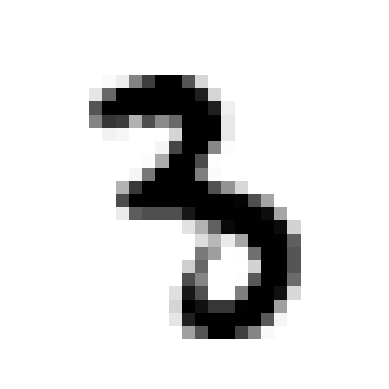

In [17]:
# Plot the first testing point
plot_digit(X_train[0])

In [18]:
# predict
sgd_clf.predict([X_train[0]])

array([False])

<font color='red'>Q. Use the above classifier to analyse the trained model.</font><br>

Ans. Remember DO NOT use the test set until the end. Test set should be only used to report the performance of the model. <br> Predict some point say: <br> ```dummy_clf.predict([X_train[50]])``` and then verify the result using <br>```plot_digit(X_train[50])``` or ```print(y_train[50])```.

In [19]:
# Try here



# Measuring Performance

## Dummy Classifier

In [20]:
# 1. Confusion Matrix for dummy classifier
y_pred_dummy = dummy_clf.predict(X_test)
cm_dummy = confusion_matrix(y_test_5, y_pred_dummy)
cm_dummy

array([[12737,     0],
       [ 1263,     0]])

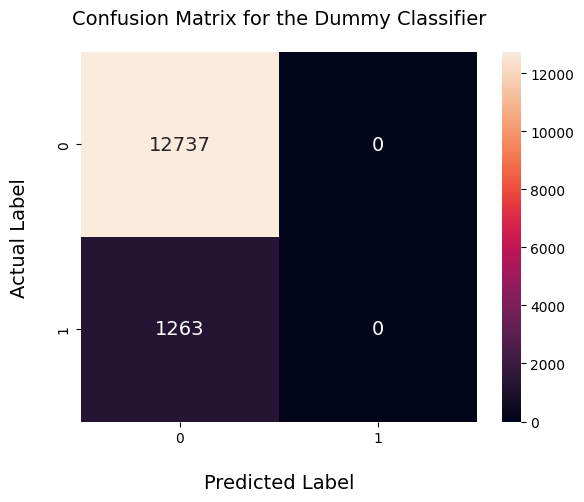

In [21]:
# Plot confusion matrix
# sns.heatmap(cm_dummy, annot=True)

ax = sns.heatmap(cm_dummy, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)

# set y-axis label and ticks
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)

# set plot title
ax.set_title("Confusion Matrix for the Dummy Classifier", fontsize=14, pad=20)

plt.show()

In [22]:
print(classification_report(y_test_5, y_pred_dummy))

              precision    recall  f1-score   support

       False       0.91      1.00      0.95     12737
        True       0.00      0.00      0.00      1263

    accuracy                           0.91     14000
   macro avg       0.45      0.50      0.48     14000
weighted avg       0.83      0.91      0.87     14000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SGD Classifier

In [23]:
# 1. Confusion Matrix for sgd classifier
y_pred_sgd = sgd_clf.predict(X_test)
cm_sgd = confusion_matrix(y_test_5, y_pred_sgd)
cm_sgd

array([[12494,   243],
       [  293,   970]])

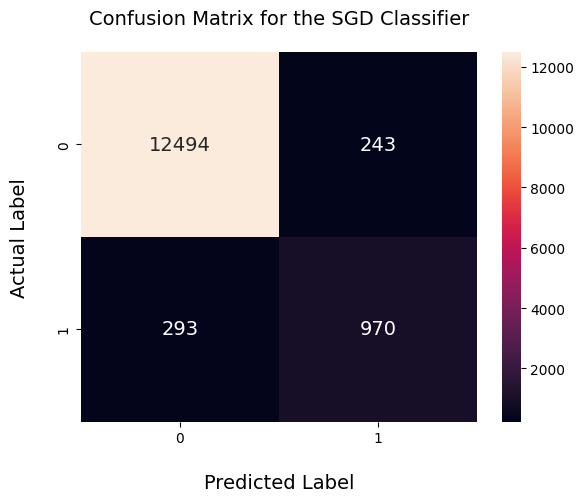

In [24]:
# Plot confusion matrix

ax = sns.heatmap(cm_sgd, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)

# set y-axis label and ticks
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)

# set plot title
ax.set_title("Confusion Matrix for the SGD Classifier", fontsize=14, pad=20)

plt.show()

In [25]:
print(classification_report(y_test_5, y_pred_sgd))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98     12737
        True       0.80      0.77      0.78      1263

    accuracy                           0.96     14000
   macro avg       0.89      0.87      0.88     14000
weighted avg       0.96      0.96      0.96     14000



# Exercise

<p style="text-align:center; font-size:1.35rem"> <font color='red'>Recommend new models for the same task which can get better performance. Why is that so?</font></p><br>

Ans. Read about more models [here](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).

THE END